# Mean and median

- Khi sử dụng cv2.CV_8U:
Kết quả của phép tích chập sẽ được lưu trữ dưới dạng số nguyên không dấu 8-bit. Điều này có nghĩa là nếu các giá trị tính toán được vượt quá 255 hoặc nhỏ hơn 0, chúng sẽ được cắt (clipped) để nằm trong khoảng [0, 255].

- áp dụng padding (Same Convolution) vào làm mờ ảnh, mặc định filter2D sẽ tự động sài padding để giữ size ảnh 

- càng tăng kernel rộng ra thì ảnh càng mờ

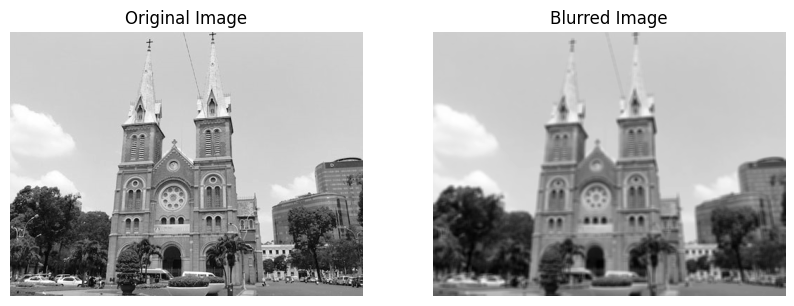

In [2]:
# áp dụng padding (Same Convolution) vào làm mờ ảnh

import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('./img/nhatho.jpg', 0)

# chia cho (5x5) để tính trung bình từng điểm ảnh đi qua
kernel = np.ones((5, 5),np.float32) / 25.0

#compute mean for each pixel
dst = cv2.filter2D(image,cv2.CV_8U, kernel)

plt.figure(figsize=(10, 5))

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Hiển thị ảnh đã làm mờ
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()

## Numpy Review

In [2]:
#Masking 
arr = np.array([[1, 2],
                [3, 4],
                [5, 6]
])

# tìm phần tử lớn hơn 2

bool_idx = (arr > 2)

# get satisfying elements
result = arr[bool_idx]
print(result)

[3 4 5 6]


In [3]:
# Fancy Indexing 

import numpy as np 
arr = np.arange(6).reshape(2, -1)
print(arr)

# lấy 2 phần tử (0, 2) -> 2, (1, 1) -> 4
row = np.array([0, 1])
col = np.array([2, 1])

print(arr[row, col])

[[0 1 2]
 [3 4 5]]
[2 4]


In [6]:
import numpy as np

# after transfer
arr = np.ones((5, 5))
print("before transfer \n", arr)

roi = arr[1:4, 1:4]
roi = roi + 1

arr[1:4, 1:4] = roi

print("after transfer \n",arr)

before transfer 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
after transfer 
 [[1. 1. 1. 1. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1.]]


## Image Blurring

- ROI : Region Of Interest
- img , tọa độ góc trái , tọa độ góc phải ,color, độ dày viền
$\newline$
cv2.rectangle(image,(x, y), ((x + w),(y + h), (0,255,0), 1))

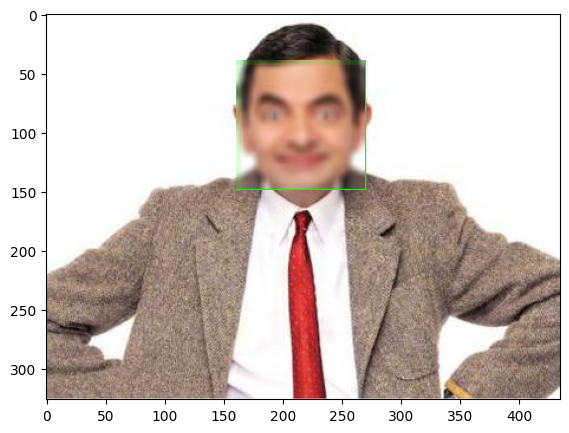

In [18]:
'''
Dùng ảnh xám để detect lấy tọa độ rồi vẽ lên ảnh màu

trong numpy : hàng là trục y , cột là trục x
'''

# face dectection setup
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#load image in grayscale
image = cv2.imread('./img/mrbean.jpg', 1)

#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#face detection
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# chia cho (7x7) để tính trung bình cho convolution
kernel = np.ones((7,7), np.float32) / 49

#Draw rectangle around eachface
for (x, y, w, h) in faces:
    # img , tọa độ góc trái , tọa độ góc phải ,color, độ dày viền
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    roi = image[y:y + h, x:x + h]
    roi = cv2.filter2D(roi, cv2.CV_8U, kernel)

    image[y:y + h, x:x + h] = roi
color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.imshow(color_image)
plt.show()

## Apply Median for Image Denoising

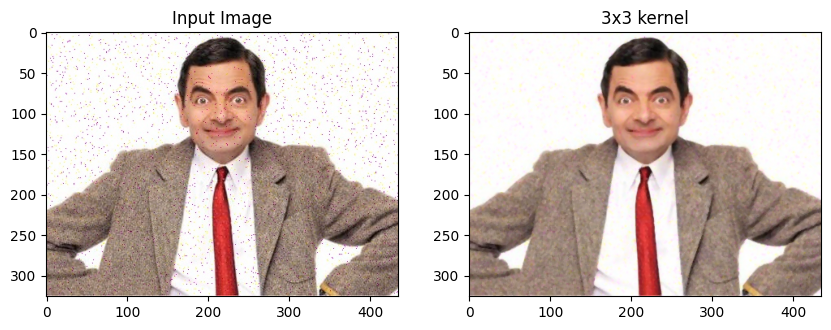

In [24]:
img1 = cv2.imread('./img/mrbean_noise.jpg')
img_color = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# áp dụng kernel 3x3
img_blurr = cv2.medianBlur(img_color, 3)

#show images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(img_color)

plt.subplot(1, 2, 2)
plt.imshow(img_blurr)
plt.title('3x3 kernel')
plt.show()

## Histogram equalization

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

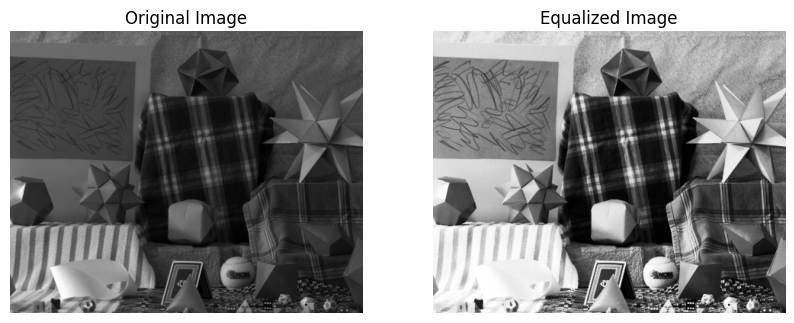

In [7]:
img = cv2.imread('./img/scene.png', 0)
equ = cv2.equalizeHist(img)

fig = plt.figure(figsize=(10, 5))

#  1 hàng 2 cột vị trí thứ 1
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.axis('off')

#  1 hàng 2 cột ví trí thứ 2
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap="gray")
plt.title('Equalized Image')
plt.axis('off')

plt.show()

cv2.equalizeHist() trong OpenCV chỉ được sử dụng cho hình ảnh đơn kênh, nghĩa là hàm chỉ hoạt động trên 1 đơn kênh duy nhất

--> cần chuyển về khung YUV --> lấy giá trị Y(Luminance): độ sáng rồi cân bằng histogram cho nó

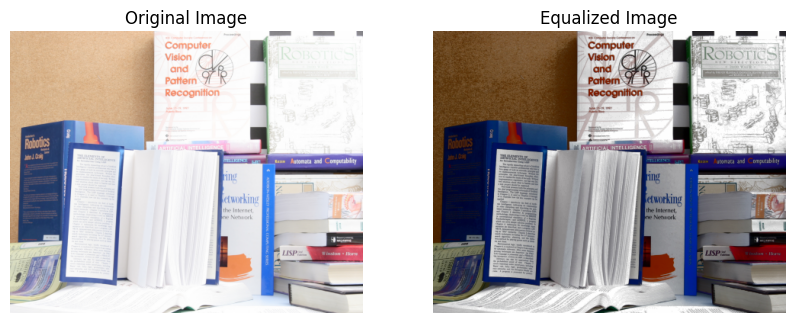

In [13]:
img = cv2.imread('./img/Book4.png')

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to YUV
img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_yuv_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

ig = plt.figure(figsize=(10, 5))

#  1 hàng 2 cột vị trí thứ 1
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.title('Original Image')
plt.axis('off')

#  1 hàng 2 cột ví trí thứ 2
plt.subplot(1, 2, 2)
plt.imshow(img_yuv_output, cmap="gray")
plt.title('Equalized Image')
plt.axis('off')

plt.show()

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
- Tham số : 
1. images: Một danh sách chứa hình ảnh nguồn mà bạn muốn tính histogram. Hình ảnh này phải nằm trong dấu ngoặc vuông, ví dụ: [image].

2. channels: Chỉ định kênh màu mà bạn muốn tính histogram. Với ảnh xám, giá trị là [0]. Với ảnh màu, bạn có thể chỉ định [0] cho kênh xanh dương, [1] cho kênh xanh lá, và [2] cho kênh đỏ.

3. mask: Mặt nạ tùy chọn để chỉ định vùng của hình ảnh mà bạn muốn tính histogram. Nếu bạn không cần sử dụng mặt nạ, hãy đặt giá trị này là None.

4. histSize: Số lượng các phần (bins) trong histogram. Thông thường, giá trị này là [256] cho ảnh xám 8-bit để đại diện cho tất cả các giá trị pixel từ 0 đến 255.

5. ranges: Phạm vi các giá trị cần xem xét cho histogram. Đối với ảnh xám, thường là [0, 256] để bao gồm tất cả các giá trị pixel từ 0 đến 255.

6. hist: Đối tượng histogram đầu ra, không bắt buộc.

7. accumulate: Một cờ boolean, nếu được đặt là True, histogram của các lần gọi khác nhau sẽ được cộng dồn lại. Mặc định là False.

- matplotlib :
1. plt.xlim([0, 256]):
$\newline$
 plt.xlim([0, 256]): Thiết lập giới hạn cho trục x của biểu đồ. Nó quy định rằng trục x sẽ chạy từ 0 đến 256.

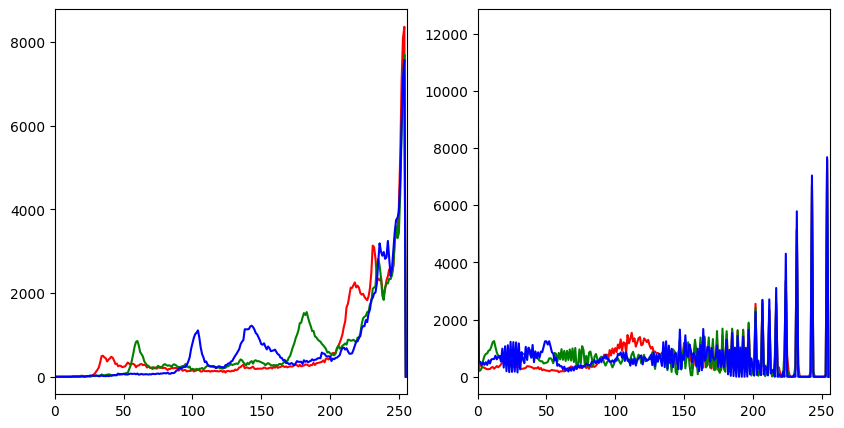

In [20]:
colors = ['r','g','b']

fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
for i , color in enumerate(colors):
    histr = cv2.calcHist([img_color], [i], None, [256], [0, 255])
    plt.plot(histr, color=color)
    plt.xlim([0, 256])

plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    histr = cv2.calcHist([img_yuv_output], [i], None, [256], [0, 255])
    plt.plot(histr, color=color)
    plt.xlim([0, 256])

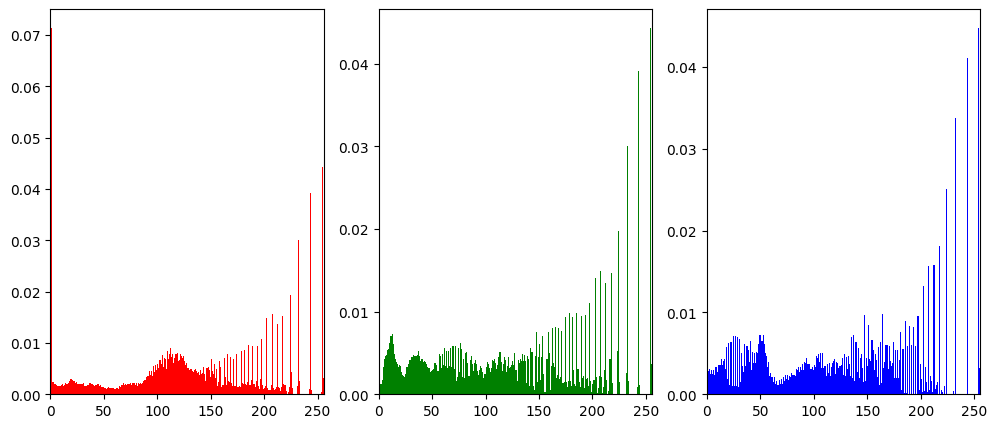

In [31]:
fig = plt.figure(figsize=(12,5))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.hist(img_yuv_output[:,:,i].flatten(), 256, [0, 256], color=color, density=True)
    plt.xlim([0, 256])
plt.show()

Nếu như tính theo công thức thì có 1 bước tính PMF để kiểm tra xác suất từng khung màu , rồi khi tính cdf(hàm tích lũy) nó mới chạy từ 0 -> 1 được , nhưng vì mình không tính PMF , nên khi tính cdf xong thì chia max để normalize nó về 0 -> 1

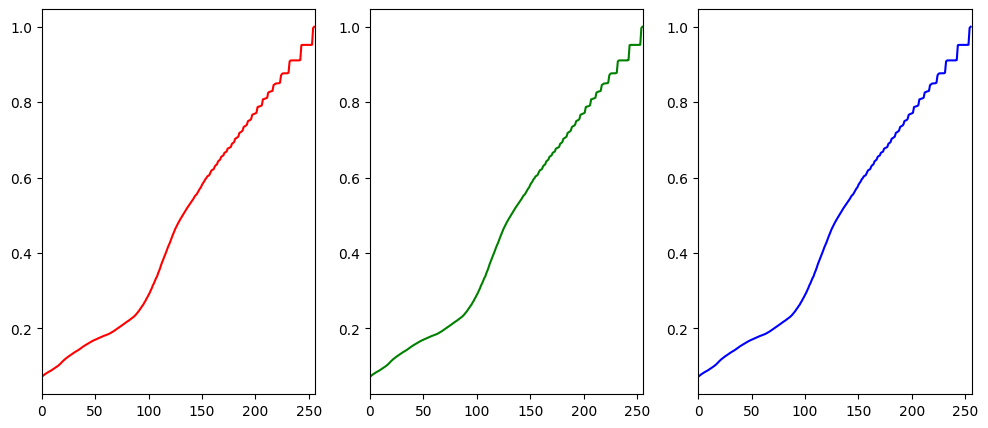

In [36]:

fig = plt.figure(figsize=(12, 5))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    hist, bins = np.histogram(img_yuv_output[:, :, 0].flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    plt.plot(cdf_normalized, color=color)
    plt.xlim([0, 256])
plt.show()